# Materials associated with the paper: 

Cao, W., Zahirovic, S., Flament, N., Williams, S., Golonka, J., and Müller, R. D., 2017: Improving global paleogeography since the late Paleozoic using paleobiology, Biogeosciences, 14, 5425-5439. https://doi.org/10.5194/bg-14-5425-2017.

### This Jupyter notebook aims to plot Figures 4-11 for the above paper.

The code in this notebook is written in Python 2.7. It utilizes standard scientific Python modules and the open source module 'pygplates' which provides a Python API to the open source GPlates software (https://www.gplates.org/). The software 'GMT' (The Generic Mapping Tools, http://gmt.soest.hawaii.edu/projects/gmt) also needs to be installed. Here, the source code has been modified to Python 3.7 by Behnam Sadeghi.

## Figure 4

### Import Python modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygplates
import os
os.environ['PROJ_LIB'] = r'C:\ProgramData\Anaconda3\pkgs\proj4-5.1.0-hfa6e2cd_1\Library\share'
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from IPython.display import Image
from IPython.display import IFrame
from resolve_topologies import resolve_topologies as topology2gmt
%matplotlib inline

### Read input data and make the figure

In [2]:
# Input data
Data = pd.read_csv('../Data/Timescale.csv', delimiter=',')  
reconstruction_time_list = Data['Time intervals']
FigNum_list = np.arange(64,17,-2)
FromAge_list = Data['From_age']
ToAge_list = Data['To_age']

reconstruction_time = 76
FigNum = 52
FromAge = 81
ToAge = 58
anchor_plate= 0
i = 7

# name outfile
outfile= 'Output/Fig_04b.ps'

# input paleogeog
basedir_BeforeModified = '../Data/'+str(reconstruction_time)+'/7_2_Reconstructed_Paleogeog_Matthews2016_'+str(reconstruction_time)+'Ma_GapsFixed'

icesheet_BeforeModified =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)
mountain_BeforeModified =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)
landmass_BeforeModified = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)
shallow_marine_BeforeModified = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)

# set projection and basemap
proj='-JW0/10i'
basemap_range = '-Rg'
os.system('gmt gmtset FONT_ANNOT_PRIMARY +15p')
os.system('gmt psbasemap %s %s -Ba30f30WE -K > %s ' % (basemap_range,proj,outfile)) #-Rg -Ba30f30WE

tmp = pygplates.FeatureCollection(shallow_marine_BeforeModified)
tmp.write('sm_BeforeModified.gmt')
tmp = pygplates.FeatureCollection(landmass_BeforeModified)
tmp.write('lm_BeforeModified.gmt')
tmp = pygplates.FeatureCollection(mountain_BeforeModified)
tmp.write('m_BeforeModified.gmt')
if os.path.isfile(icesheet_BeforeModified):
    tmp = pygplates.FeatureCollection(icesheet_BeforeModified)
    tmp.write('i_BeforeModified.gmt')
else:
        print ('No icesheet found')

os.system('gmt psxy %s %s -G191/239/255 sm_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
os.system('gmt psxy %s %s -Gblue lm_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
os.system('gmt psxy %s %s -Gblue m_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile))
if os.path.isfile(icesheet_BeforeModified):
    os.system('gmt psxy %s %s -Gblue i_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile))
else:
    print ('No icesheet found')

## plot reconstructed paleogeog before modification
basedir = '../Data/'+str(reconstruction_time)+'/15_Reconstructed_Paleogeog_Matthews2016_'+str(reconstruction_time)+'Ma_Corrected'

icesheet =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
mountain =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
landmass = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)

tmp = pygplates.FeatureCollection(landmass)
tmp.write('lm.gmt')
tmp = pygplates.FeatureCollection(mountain)
tmp.write('m.gmt')
if os.path.isfile(icesheet):
    tmp = pygplates.FeatureCollection(icesheet)
    tmp.write('i.gmt')
else:
    print ('No icesheet found')

os.system('gmt psxy %s %s -G200/200/200 lm.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235 
if os.path.isfile(icesheet):
    os.system('gmt psxy %s %s -G180/180/180 m.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
    os.system('gmt psxy %s %s -G120/120/120 i.gmt -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
else:
    print ('No icesheet found')
    os.system('gmt psxy %s %s -G180/180/180 m.gmt -O -N >> %s' % (basemap_range,proj,outfile))  

######################################
os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma
os.system('gmt ps2raster %s -A -E150 -Tg -P' % outfile)  #-F${reconstruction_time}Ma
os.system('rm *.xml *.gmt *.conf *.xml *.shx *.shp *.history *.pyc *.shx *.prj *.dbf')
os.system('rm Output/*.ps')

#IFrame("Output/Fig_04b.pdf", width=1000, height=500)
#Image('Output/Fig_04b.png')


1

## Figure 5

### Read the data and make the figure

In [3]:
Data = pd.read_csv('../Data/CR/ReconPaleogeog_EB2015v1_Modified410_2Ma/ReconPaleogeog_EB2015v1_Modified410_2Ma.csv', delimiter=',')  
reconstruction_time_list = Data['Time intervals']
FigNum_list = np.arange(64,17,-2)
FromAge_list = Data['From_age']
ToAge_list = Data['To_age']

reconstruction_time = 76
FigNum = 52
FromAge = 81
ToAge = 58
anchor_plate= 0

i = 7

#for i,reconstruction_time,FigNum,FromAge,ToAge in zip(np.arange(1,2,1),reconstruction_time_list,FigNum_list,FromAge_list,ToAge_list):
#    print reconstruction_time,FigNum,FromAge, ToAge

# name outfile
outfile= 'Output/Fig_05.ps'

#######
# input paleogeog in the folder of 7_2
basedir_BeforeModified = '../Data/'+str(reconstruction_time)+'/7_2_Reconstructed_Paleogeog_Matthews2016_'+str(reconstruction_time)+'Ma_GapsFixed'

icesheet_BeforeModified =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)
mountain_BeforeModified =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)
landmass_BeforeModified = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)
shallow_marine_BeforeModified = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir_BeforeModified,FigNum,FromAge,ToAge,reconstruction_time)

# set projection and basemap
#proj='-JW0/10' # 126Ma, 396Ma
#proj='-JW0/12' # 76Ma

# 76Ma
# NorthAmerica
#proj='-JB-80/45/20/70/8c'
#proj='-JW-80/8c'
#basemap_range = '-R-120/-40/20/70' # NorthAmerica

#SouthAmerica
#proj='-JB-47.5/-37.5/-65/-30/8c'
#proj='-JW-47.5/8c'
#basemap_range = '-R65W/30W/55S/20S' # SouthAmerica

# NorthAfrica
#proj='-JB12.5/12.5/-25/50/8c'
proj='-JW12.5/16c'
basemap_range = '-R25W/50E/5S/30N' # NorthAfrica

# India
#proj='-JB55/-27.5/-40/-15/8c'
#proj='-JW55/8c' #Mollweide
#basemap_range = '-R40/70/-40/-15' # India

# plot the data
os.system('gmt gmtset MAP_FRAME_TYPE plain')
os.system('gmt gmtset FONT_ANNOT_PRIMARY +15p') # North America, north Africa
#os.system('gmt gmtset FONT_ANNOT_PRIMARY +20p') # South America, India

tmp = pygplates.FeatureCollection(shallow_marine_BeforeModified)
tmp.write('sm_BeforeModified.gmt')
tmp = pygplates.FeatureCollection(landmass_BeforeModified)
tmp.write('lm_BeforeModified.gmt')
tmp = pygplates.FeatureCollection(mountain_BeforeModified)
tmp.write('m_BeforeModified.gmt')
if os.path.isfile(icesheet_BeforeModified):
    tmp = pygplates.FeatureCollection(icesheet_BeforeModified)
    tmp.write('i_BeforeModified.gmt')
else:
        print ('No icesheet found')

os.system('gmt psxy %s %s -G191/239/255 sm_BeforeModified.gmt -K -N > %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
os.system('gmt psxy %s %s -Gblue lm_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
os.system('gmt psxy %s %s -Gblue m_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile))
if os.path.isfile(icesheet_BeforeModified):
    os.system('gmt psxy %s %s -Gblue i_BeforeModified.gmt -K -O -N >> %s' % (basemap_range,proj,outfile))
else:
    print ('No icesheet found')

#############################################
## plot reconstructed paleogeog after modification
basedir = '../Data/'+str(reconstruction_time)+'/15_Reconstructed_Paleogeog_Matthews2016_'+str(reconstruction_time)+'Ma_Corrected'

icesheet =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
mountain =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
landmass = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
shallow_marine = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)

tmp = pygplates.FeatureCollection(shallow_marine)
tmp.write('sm.gmt')
tmp = pygplates.FeatureCollection(landmass)
tmp.write('lm.gmt')
tmp = pygplates.FeatureCollection(mountain)
tmp.write('m.gmt')
if os.path.isfile(icesheet):
    tmp = pygplates.FeatureCollection(icesheet)
    tmp.write('i.gmt')
else:
    print ('No icesheet found')

#os.system('gmt psxy %s %s -G191/239/255 sm.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235 
os.system('gmt psxy %s %s -G200/200/200 lm.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235 
if os.path.isfile(icesheet):
    os.system('gmt psxy %s %s -G180/180/180 m.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
    os.system('gmt psxy %s %s -G120/120/120 i.gmt -K -O -N >> %s' % (basemap_range,proj,outfile)) #-W1p,235/235/235
else:
    print ('No icesheet found')
    os.system('gmt psxy %s %s -G180/180/180 m.gmt -K -O -N >> %s' % (basemap_range,proj,outfile))  

os.system('gmt psbasemap %s %s -Ba20f10weSn -O >> %s ' % (basemap_range,proj,outfile)) #-Rg -Ba30f30WE

######################################
os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma
os.system('gmt ps2raster %s -A -E150 -Tg -P' % outfile)  #-F${reconstruction_time}Ma
#Image('Output/Fig_05.png')
os.system('rm *.xml *.gmt *.conf *.xml *.shx *.shp *.history *.pyc *.shx *.prj *.dbf')
os.system('rm Output/*.ps')

#IFrame("Output/Fig_05.pdf", width=1000, height=500)
#Image('Output/Fig_05.png')


1

## Figure 6

### Read the data

In [4]:
# Fossils testing paelogeog after gaps fixed
Data1 = pd.read_excel('../Data/CR/CR_ReconPaleogeog_Matthews2016_TestByFossils/CR_ReconPaleogeog_Matthews2016_TestByFossils.xlsx', delimiter=',')  
# Fossils testing paelogeog after modification using paleobiology
Data3 = pd.read_excel('../Data/CR/CR_ReconPaleogeog_Matthews2016_ModifiedFossils/CR_ReconPaleogeog_Matthews2016_ModifiedFossils.xlsx', delimiter=',')  


### Make the figure

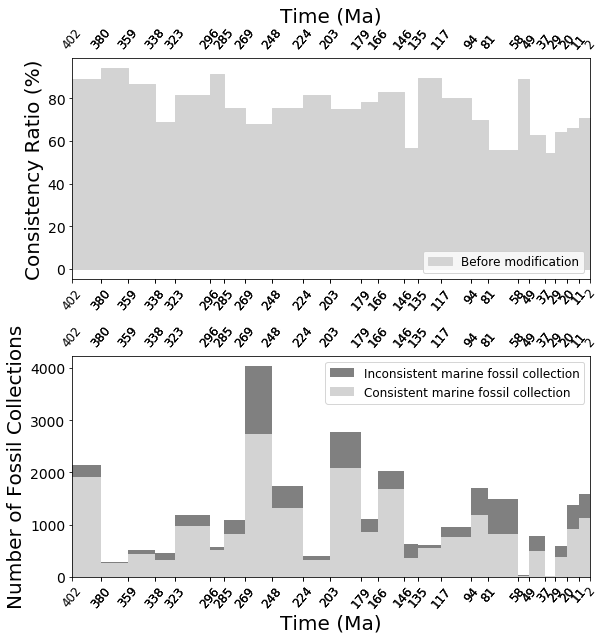

In [5]:
fig, (ax1, ax4) = plt.subplots(2,1,figsize=(8.5,9),tight_layout=True) #tight_layout=True,sharex=True

################## Tests before modifying
ConsistencyRatio_Marine_1 = np.zeros(len(Data1['Marine Fossil Consistency Ratio'])*2)
ConsistencyRatio_Marine_1[::2] = 100*np.asarray(Data1['Marine Fossil Consistency Ratio'])
ConsistencyRatio_Marine_1[1::2] = 100*np.asarray(Data1['Marine Fossil Consistency Ratio'])

#create an array to install FromAge and ToAge at the same time
TimeStep = np.zeros(len(Data1['From_age'])*2)
TimeStep[::2] = Data1['To_age']
TimeStep[1::2] = Data1['From_age']
#print timestep

### Plot the first subplot
p1_1 = ax1.fill_between(TimeStep,ConsistencyRatio_Marine_1,color='lightgrey',label='Before modification')
#p1_2 = ax1.plot(TimeStep,ConsistencyRatio_Marine_3,'k-',linewidth=2.0,label='After modification')

bar_width=Data1['bar_width']
#p4_1 = ax4.bar(Data1['Ave_age'],Data1['Overall Marine Fossils'], bar_width, align='center', color='lightgrey',edgecolor='None',label='Marine fossil collection')
p4_1 = ax4.bar(Data1['Ave_age'],Data1['Overall Marine Fossils'], bar_width, align='center', color='grey',edgecolor='None',label='Inconsistent marine fossil collection')
p4_2 = ax4.bar(Data1['Ave_age'],Data1['Consistent Marine Fossils'], bar_width, align='center', color='lightgrey',edgecolor='None',label='Consistent marine fossil collection')

################## pbdb corrected
ConsistencyRatio_Marine_3 = np.zeros(len(Data3['Marine Fossil Consistency Ratio'])*2)
ConsistencyRatio_Marine_3[::2] = 100*np.asarray(Data3['Marine Fossil Consistency Ratio'])
ConsistencyRatio_Marine_3[1::2] = 100*np.asarray(Data3['Marine Fossil Consistency Ratio'])

##################
# set legend
ax1.legend(loc='lower right',fontsize=12)

# set y axis
ax1.set_ylabel('Consistency Ratio (%)', fontsize=20)
ax1.yaxis.set_tick_params(labelsize=14,direction='out')
ax1.yaxis.set_ticks_position('left')

# set lable of x axis: 'Time (Ma)'
ax1.set_xlim((402,2))
ax1.set_xlabel('Time (Ma)', fontsize=20)
ax1.xaxis.set_label_position('top') # set x axis's label but not x ticks' label

# set ticks and values on x axis:
ax1.set_xticks(np.hstack((Data1['From_age'],Data1['To_age'])))
ax1.xaxis.set_tick_params(direction='out',labelsize=12) #set the ticks outside
ax1.xaxis.set_tick_params(labeltop='on')
ax1.xaxis.set_tick_params(labelbottom='off')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=50)
#ax1.tick_params(direction='out', length=6, width=2, colors='r')
#ax1.xaxis.set_ticks_position('both')
#ax1.xaxis.set_ticks(np.hstack((Data1['From_age'],Data1['To_age'])))
#ax1.spines['bottom'].set_color('none') # set the axis invisible or not

#set p4
#ax4.legend((p4_1[0],'Marine Fossil Collections'), loc='upper right',fontsize=12)
ax4.legend(loc='upper right',fontsize=12)
ax4.set_ylabel('Number of Fossil Collections', fontsize=20)
ax4.yaxis.set_tick_params(labelsize=14,direction='out')
ax4.yaxis.set_ticks_position('left')

# set x labels
ax4.set_xlim((402,2))
ax4.set_xlabel('Time (Ma)', fontsize=20)
# set x tick and ticks' labels
ax4.set_xticks(np.hstack((Data1['From_age'],Data1['To_age']))) #, rotation=50,,verticalalignment='top'
ax4.xaxis.set_tick_params(direction='out',labelsize=12) #labelsize=10,
ax4.xaxis.set_tick_params(labeltop='off')
ax4.xaxis.set_tick_params(labelbottom='on')
#ax4.xaxis.set_ticks_position('bottom')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=50)

#plt.grid()
#plt.legend(('Marine Fossils1','Terrestrial Fossils1','Marine Fossils2','Terrestrial Fossils2'),bbox_to_anchor=(.8,.25), loc=2, borderaxespad=0.) #,bbox_to_anchor=(1.,1.), loc=2, borderaxespad=0.

plt.savefig('Output/Fig_06.pdf')
plt.show()


## Figure 7

### Read the data and make the figure

In [6]:
input_feature_filename = '../Data/Matthews++_410-0Ma/Coastlines/Coastlines_low_res_Matthews++.shp'
input_rotation_filename = ['../Data/Matthews++_410-0Ma/Global_EB_250-0Ma_GK07_Matthews++.rot',
                           '../Data/Matthews++_410-0Ma/Global_EB_410-250Ma_GK07_Matthews++.rot']
#input_rotation_filename = '/Users/wenchaocao/Desktop/New_Rotation.rot'

Data = pd.read_csv('../Data/Timescale.csv', delimiter=',')  
reconstruction_time_list = Data['Time intervals']
FigNum_list = np.arange(64,17,-2)
FromAge_list = Data['From_age']
ToAge_list = Data['To_age']

reconstruction_time = []
FigNum = []
FromAge= []
ToAge= []
anchor_plate= 0

for i,reconstruction_time,FigNum,FromAge,ToAge in zip(np.arange(1,2,1),reconstruction_time_list,FigNum_list,FromAge_list,ToAge_list):
    print (i,reconstruction_time,FigNum,FromAge,ToAge)

    # Name of ouput file
    output_reconstructed_feature_filename = 'coastlines_%0.2fMa.shp' % reconstruction_time

    # Use pygplates to carry out the reconstruction 
    pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate) 

    #print output_reconstructed_feature_filename
    input_topology_filename = ['../Data/Matthews++_410-0Ma/Mesozoic-Cenozoic_plate_boundaries_Matthews++.gpml', 
                              '../Data/Matthews++_410-0Ma/Paleozoic_plate_boundaries_Matthews++.gpml',
                              '../Data/Matthews++_410-0Ma/TopologyBuildingBlocks_Matthews++.gpml']

    output_filename_prefix = ''
    output_filename_extension = 'gmt'

    topology2gmt(input_rotation_filename,
                 input_topology_filename,
                 reconstruction_time,
                 output_filename_prefix,
                 output_filename_extension,
                 0)
    
    # name output file
    outfile = 'Output/Fig_07.ps'
    
    # input data
    basedir = '../Data/'+str(reconstruction_time)+'/11_Reconstructed_Paleogeog_EBIDs_'+str(reconstruction_time)+'Ma_Matthews2016GPC_Modified/'
    icesheet =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time)
    mountain =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time)
    landmass = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time)
    shallow_marine = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time,reconstruction_time)

    # Select a projection - central meridian is set to 30 deg longitude for each
    #proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
    #proj='-JN30/5i'      # uncomment for Robinson projection
    proj='-JW0/10i'    # uncomment for Mollweide projection
    #proj='-JQ0/0/10i'  #-JQ[lon0/[lat0/]]width (Cylindrical Equidistant)

    os.system('gmt gmtset FONT_ANNOT_PRIMARY +20p')
    os.system('gmt gmtset MAP_FRAME_PEN 0.02c')
    os.system('gmt gmtset MAP_TICK_LENGTH_PRIMARY 4p/2p') #4p/2p
    #os.system('gmt gmtset MAP_FRAME_TYPE plain') # set ticks inside the frame inside
    #os.system('gmt gmtset PS_PAGE_COLOR green')
    #os.system('gmt gmtset COLOR_FOREGROUND yellow')

    if i%2==0:
        os.system('gmt psbasemap -Rg %s -Ba30f30We -K > %s ' % (proj,outfile)) #-Ba90f30g30/a30f30g30     #left
    else:
        os.system('gmt psbasemap -Rg %s -Ba30f30wE -K > %s ' % (proj,outfile)) #-Ba90f30g30/a30f30g30 #right
    # None
    #os.system('gmt psbasemap -Rg %s -Ba30f30We -K > %s ' % (proj,outfile)) #-Ba90f30g30/a30f30g30 %s  
    ###############################################################

    #rename files (shapefile -> shapefile; shapefile ->.gmt)
    tmp = pygplates.FeatureCollection(shallow_marine)
    tmp.write('sm.gmt')
    tmp = pygplates.FeatureCollection(landmass)
    tmp.write('lm.gmt')
    tmp = pygplates.FeatureCollection(mountain)
    tmp.write('m.gmt')

    if os.path.isfile(icesheet):
        tmp = pygplates.FeatureCollection(icesheet)
        tmp.write('i.gmt')
    else:
            print ('No icesheet found')

    tmp = pygplates.FeatureCollection(output_reconstructed_feature_filename)
    tmp.write('coastlines.gmt')

    #plot paleogeographic features
    os.system('gmt psxy -Rg %s -W0p,lightblue -Glightblue sm.gmt -K -O -N >> %s' % (proj,outfile))
    os.system('gmt psxy -Rg %s -W0p,yellow -Gyellow lm.gmt -K -O -N >> %s' % (proj,outfile))
    os.system('gmt psxy -Rg %s -W0p,orange -Gorange m.gmt -K -O -N >> %s' % (proj,outfile))
    if os.path.isfile(icesheet):
        os.system('gmt psxy -Rg %s -W0p,223/223/255 -G223/223/255 i.gmt -K -O -N >> %s' % (proj,outfile))
    else:
        print ('No icesheet found')

    #plot coastlines
    os.system('gmt psxy -Rg %s -W0.2p,grey60 -K -O -m coastlines.gmt -V >> %s' % (proj,outfile))

    #plot subduction zones, mid ocean ridges, transforms
    os.system('gmt psxy -Rg %s -W0.4p,black -K -O -m boundary_polygons_%0.2fMa.gmt -V >> %s' % (proj,reconstruction_time,outfile))
    os.system('gmt psxy -Rg %s -W0.2p,black -Sf15p/4plt -K -O -m subduction_boundaries_sL_%0.2fMa.gmt -Gblack -V >> %s' % (proj,reconstruction_time,outfile))
    os.system('gmt psxy -Rg %s -W0.2p,black -Sf15p/4prt -O -m subduction_boundaries_sR_%0.2fMa.gmt -Gblack -V >> %s' % (proj,reconstruction_time,outfile))

    #b means BMP, e means EPS, E means EPS with PageSize command, f means PDF, F means multi-page PDF, j means JPEG, g means PNG, G means transparent PNG (untouched regions are transparent), m means PPM, and t means TIFF [default is JPEG]
    os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma
    os.system('gmt ps2raster %s -A -E150 -Tg -P' % outfile)  #-F${reconstruction_time}Ma

    os.system('rm *.xml *.gmt *.conf *.xml *.shx *.shp *.history *.pyc *.shx *.prj *.dbf')
    os.system('rm Output/*.ps')

#IFrame("Output/Fig_07.pdf", width=1000, height=500)
#Image('Output/Fig_07.png')


1 6 64 11 2


## Figure 8

### Input the data

In [7]:
#Area of each paleogeog after Modified
Area_AfterModified = pd.read_excel('../Data/Flooding/8_Areas_Matthews2016Modified_402-2Ma/8_Areas_Matthews2016Modified_402-2Ma.xlsx', delimiter=',')  
#Area of each paleogeog before Modified
Area_BeforeModified = pd.read_excel('../Data/Flooding/7_Areas_Matthews2016_GapFixed_402-2Ma/7_Areas_Matthews2016_GapFixed_402-2Ma.xlsx', delimiter=',')  
#Area of each paleogeog before gaps fixed
Area_BeforeGapsFixed = pd.read_excel('../Data/Flooding/2_2_Areas_Matthews2016_BeforeFixed/2_2_Areas_Matthews2016_BeforeFixed.xlsx', delimiter=',')  
#Area of original paleogeog of Golonka
Area_Original = pd.read_excel('../Data/Flooding/9_Areas_ReconsPaleogeog_EBIDs/9_Areas_ReconsPaleogeog_EBIDs.xlsx', delimiter=',')  


### Processing the data

In [8]:
##################
Area_Ice_sheet = np.zeros(len(Area_AfterModified['From_age'])*2)
Area_Ice_sheet[::2] = np.asarray(Area_AfterModified['Area_i(x10^7 sq.km)'])
Area_Ice_sheet[1::2] = np.asarray(Area_AfterModified['Area_i(x10^7 sq.km)'])

Area_Mountain = np.zeros(len(Area_AfterModified['From_age'])*2)
Area_Mountain[::2] = np.asarray(Area_AfterModified['Area_m'])
Area_Mountain[1::2] = np.asarray(Area_AfterModified['Area_m'])

Area_Landmass = np.zeros(len(Area_AfterModified['From_age'])*2)
Area_Landmass[::2] = np.asarray(Area_AfterModified['Area_lm'])
Area_Landmass[1::2] = np.asarray(Area_AfterModified['Area_lm'])

Area_Shallow_marine = np.zeros(len(Area_AfterModified['From_age'])*2)
Area_Shallow_marine[::2] = np.asarray(Area_AfterModified['Area_sm'])
Area_Shallow_marine[1::2] = np.asarray(Area_AfterModified['Area_sm'])

Area_Deep_ocean = np.zeros(len(Area_AfterModified['From_age'])*2)
Area_Deep_ocean[::2] = np.asarray(Area_AfterModified['Area_do'])
Area_Deep_ocean[1::2] = np.asarray(Area_AfterModified['Area_do'])
#print Area_Deep_ocean

#create an array to install FromAge and ToAge at the same time
TimeStep = np.zeros(len(Area_AfterModified['From_age'])*2)
TimeStep[::2] = Area_AfterModified['To_age']
TimeStep[1::2] = Area_AfterModified['From_age']
#print TimeStep

In [9]:
################## ice sheet
Area_Ice_sheet_before = np.zeros(len(Area_BeforeModified['From_age'])*2)
Area_Ice_sheet_before[::2] = np.asarray(Area_BeforeModified['Area_i(x10^7 sq.km)'])
Area_Ice_sheet_before[1::2] = np.asarray(Area_BeforeModified['Area_i(x10^7 sq.km)'])

Area_Mountain_before = np.zeros(len(Area_BeforeModified['From_age'])*2)
Area_Mountain_before[::2] = np.asarray(Area_BeforeModified['Area_m'])
Area_Mountain_before[1::2] = np.asarray(Area_BeforeModified['Area_m'])

Area_Landmass_before = np.zeros(len(Area_BeforeModified['From_age'])*2)
Area_Landmass_before[::2] = np.asarray(Area_BeforeModified['Area_lm'])
Area_Landmass_before[1::2] = np.asarray(Area_BeforeModified['Area_lm'])

Area_Shallow_marine_before = np.zeros(len(Area_BeforeModified['From_age'])*2)
Area_Shallow_marine_before[::2] = np.asarray(Area_BeforeModified['Area_sm'])
Area_Shallow_marine_before[1::2] = np.asarray(Area_BeforeModified['Area_sm'])

Area_Deep_ocean_before = np.zeros(len(Area_BeforeModified['From_age'])*2)
Area_Deep_ocean_before[::2] = np.asarray(Area_BeforeModified['Area_do'])
Area_Deep_ocean_before[1::2] = np.asarray(Area_BeforeModified['Area_do'])

In [10]:
##################
Area_Ice_sheet_BeforeGapsFixed = np.zeros(len(Area_BeforeGapsFixed['From_age'])*2)
Area_Ice_sheet_BeforeGapsFixed[::2] = np.asarray(Area_BeforeGapsFixed['Area_i(x10^7 sq.km)'])
Area_Ice_sheet_BeforeGapsFixed[1::2] = np.asarray(Area_BeforeGapsFixed['Area_i(x10^7 sq.km)'])

Area_Mountain_BeforeGapsFixed = np.zeros(len(Area_BeforeGapsFixed['From_age'])*2)
Area_Mountain_BeforeGapsFixed[::2] = np.asarray(Area_BeforeGapsFixed['Area_m'])
Area_Mountain_BeforeGapsFixed[1::2] = np.asarray(Area_BeforeGapsFixed['Area_m'])

Area_Landmass_BeforeGapsFixed = np.zeros(len(Area_BeforeGapsFixed['From_age'])*2)
Area_Landmass_BeforeGapsFixed[::2] = np.asarray(Area_BeforeGapsFixed['Area_lm'])
Area_Landmass_BeforeGapsFixed[1::2] = np.asarray(Area_BeforeGapsFixed['Area_lm'])

Area_Shallow_marine_BeforeGapsFixed = np.zeros(len(Area_BeforeGapsFixed['From_age'])*2)
Area_Shallow_marine_BeforeGapsFixed[::2] = np.asarray(Area_BeforeGapsFixed['Area_sm'])
Area_Shallow_marine_BeforeGapsFixed[1::2] = np.asarray(Area_BeforeGapsFixed['Area_sm'])

Area_Deep_ocean_BeforeGapsFixed = np.zeros(len(Area_BeforeGapsFixed['From_age'])*2)
Area_Deep_ocean_BeforeGapsFixed[::2] = np.asarray(Area_BeforeGapsFixed['Area_do'])
Area_Deep_ocean_BeforeGapsFixed[1::2] = np.asarray(Area_BeforeGapsFixed['Area_do'])

In [11]:
##################
# Orignal Golonka's paleogeog
Area_Ice_sheet_Original = np.zeros(len(Area_Original['From_age'])*2)
Area_Ice_sheet_Original[::2] = np.asarray(Area_Original['Area_i(x10^7 sq.km)'])
Area_Ice_sheet_Original[1::2] = np.asarray(Area_Original['Area_i(x10^7 sq.km)'])

Area_Mountain_Original = np.zeros(len(Area_Original['From_age'])*2)
Area_Mountain_Original[::2] = np.asarray(Area_Original['Area_m'])
Area_Mountain_Original[1::2] = np.asarray(Area_Original['Area_m'])

Area_Landmass_Original = np.zeros(len(Area_Original['From_age'])*2)
Area_Landmass_Original[::2] = np.asarray(Area_Original['Area_lm'])
Area_Landmass_Original[1::2] = np.asarray(Area_Original['Area_lm'])

Area_Shallow_marine_Original = np.zeros(len(Area_Original['From_age'])*2)
Area_Shallow_marine_Original[::2] = np.asarray(Area_Original['Area_sm'])
Area_Shallow_marine_Original[1::2] = np.asarray(Area_Original['Area_sm'])

Area_Deep_ocean_Original = np.zeros(len(Area_Original['From_age'])*2)
Area_Deep_ocean_Original[::2] = np.asarray(Area_Original['Area_do'])
Area_Deep_ocean_Original[1::2] = np.asarray(Area_Original['Area_do'])

In [12]:
##################
# Percentages of paleogeog features
Percent_Ice_sheet = np.zeros(len(Area_AfterModified['From_age'])*2)
Percent_Ice_sheet[::2] = np.asarray(Area_AfterModified['Percent_i(%)'])
Percent_Ice_sheet[1::2] = np.asarray(Area_AfterModified['Percent_i(%)'])

Percent_Mountain = np.zeros(len(Area_AfterModified['From_age'])*2)
Percent_Mountain[::2] = np.asarray(Area_AfterModified['Percent_m(%)'])
Percent_Mountain[1::2] = np.asarray(Area_AfterModified['Percent_m(%)'])

Percent_Landmass = np.zeros(len(Area_AfterModified['From_age'])*2)
Percent_Landmass[::2] = np.asarray(Area_AfterModified['Percent_lm(%)'])
Percent_Landmass[1::2] = np.asarray(Area_AfterModified['Percent_lm(%)'])

Percent_Shallow_marine = np.zeros(len(Area_AfterModified['From_age'])*2)
Percent_Shallow_marine[::2] = np.asarray(Area_AfterModified['Percent_sm(%)'])
Percent_Shallow_marine[1::2] = np.asarray(Area_AfterModified['Percent_sm(%)'])

Percent_Deep_ocean = np.zeros(len(Area_AfterModified['From_age'])*2)
Percent_Deep_ocean[::2] = np.asarray(Area_AfterModified['Percent_do(%)'])
Percent_Deep_ocean[1::2] = np.asarray(Area_AfterModified['Percent_do(%)'])


### Make the figure

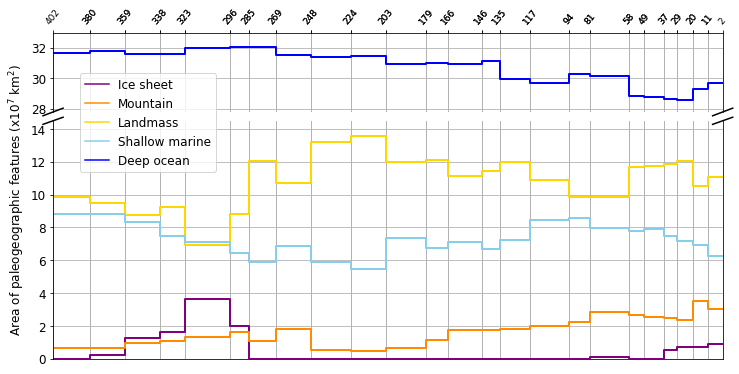

In [13]:
fig = plt.figure(figsize=(12, 6))

ax = plt.subplot2grid((19,1),(0,0),rowspan=5)
ax2= plt.subplot2grid((19,1),(5,0),rowspan=19) #,sharex=ax

# plot the same data on both axes
plot1 = ax2.plot(TimeStep,Area_Ice_sheet,'purple',
         TimeStep, Area_Mountain,'darkorange', 
         TimeStep, Area_Landmass,'gold', 
         TimeStep, Area_Shallow_marine, 'skyblue', 
         TimeStep, Area_Deep_ocean, 'blue')

#ax(gs[4:,0])
plot2 = ax.plot(TimeStep,Area_Ice_sheet,'purple',
         TimeStep, Area_Mountain,'darkorange', 
         TimeStep, Area_Landmass,'gold', 
         TimeStep, Area_Shallow_marine, 'deepskyblue', 
         TimeStep, Area_Deep_ocean, 'blue')

intervals = np.hstack(np.hstack((Area_AfterModified['From_age'],Area_AfterModified['To_age'])))

# set ax2
ax2.set_ylim(0, 14.5)  # most of the data
#ax2.set_xticks(np.hstack((Fossil_data['Time intervals'][0],Fossil_data['Time intervals'][1::2])), size=10) #, rotation=50
ax2.spines['top'].set_visible(False)
ax2.set_xticks(intervals)
ax2.set_xticklabels([])
ax2.set_xlim((402,2))
ax2.yaxis.set_tick_params(labelsize=12,direction='out')
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('none')

#set ax
ax.set_ylim(27.8, 33)  # outliers only
ax.set_xlim((402,2))
ax.spines['bottom'].set_visible(False)
ax.set_xticks(intervals)
#ax.tick_params(labeltop='on')  # don't put tick labels at the top
ax.set_yticks([28,30,32])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(labelsize=9,direction='out') #labelsize=10,
plt.setp(ax.xaxis.get_majorticklabels(), rotation=50)
ax.yaxis.set_tick_params(labelsize=12,direction='out')
ax.yaxis.set_ticks_position('left')
#ax.set_xlabel('Time (Ma)', fontsize=14)
#ax.xaxis.set_label_position('top')

d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-(16/5)*d, +(16/5)*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-(16/5)*d, +(16/5)*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.grid(True)
ax2.grid(True)
ax2.legend(('Ice sheet','Mountain','Landmass','Shallow marine','Deep ocean'),bbox_to_anchor=(0.04,1.20), loc=2, borderaxespad=0., fontsize=12)
plt.setp(plot1, linewidth=2)
plt.setp(plot2, linewidth=2)
#plt.xticks(size=10, rotation=50)

fig.subplots_adjust(hspace = 1.0)
# x, y labels, ticks, scales, line width and so on 
#plt.xlabel('Time (Ma)', fontsize=16)
plt.ylabel('Area of paleogeographic features (x'
           r'$10^7$'
           ' km'
           r'$^2$'
           ')', fontsize=12, position=(0.2,0.67))

plt.savefig('Output/Fig_08.pdf',dpi=600)
plt.show()


## Figure 10

### Make the figure

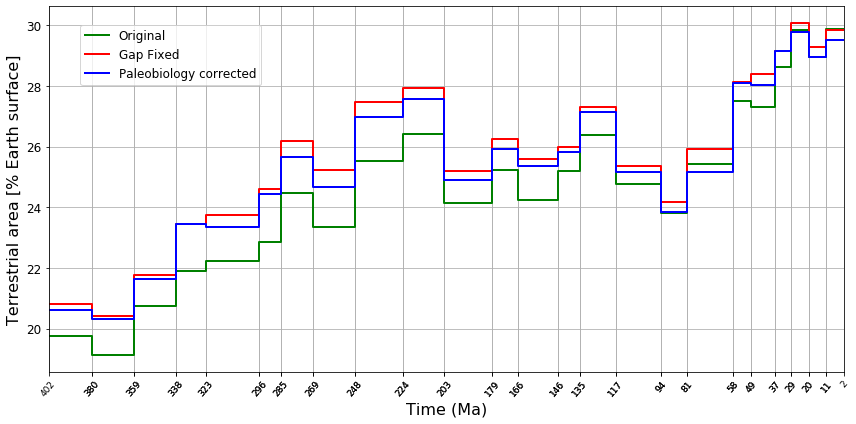

In [14]:
fig, ax2 = plt.subplots(figsize=(12,6),tight_layout=True) #figsize=(12,8),tight_layout=True, figsize=(8, 5)

#ax2.plot(TimeStep,(Area_Ice_sheet_Original+Area_Mountain_Original+Area_Landmass_Original)/0.51,'dimgrey',linewidth=6) #,marker='o'
ax2.plot(TimeStep,(Area_Ice_sheet_BeforeGapsFixed+Area_Mountain_BeforeGapsFixed+Area_Landmass_BeforeGapsFixed)/0.51,color='green',linewidth=2) #,marker='o'
ax2.plot(TimeStep,(Area_Ice_sheet_before+Area_Mountain_before+Area_Landmass_before)/0.51,'red',linewidth=2)
ax2.plot(TimeStep,(Area_Ice_sheet+Area_Mountain+Area_Landmass)/0.51,'blue',linewidth=2)

intervals = np.hstack(np.hstack((Area_AfterModified['From_age'],Area_AfterModified['To_age'])))

#ax2.spines['top'].set_visible(False)
ax2.set_xticks(intervals)
#ax2.set_xticklabels([])
ax2.set_xlim((402,2))
ax2.yaxis.set_tick_params(labelsize=12,direction='out')
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('top')
#ax2.set_ylim((18,31))
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(labelsize=9,direction='out') #labelsize=10,
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=50)
ax2.grid(True)
ax2.set_axisbelow(True)

ax2.legend(('Original','Gap Fixed','Paleobiology corrected'),bbox_to_anchor=(0.04,0.95), loc=2, borderaxespad=0., fontsize=12)

plt.xlabel('Time (Ma)', fontsize=16)
plt.ylabel('Terrestrial area [% Earth surface]',fontsize=16) #, position=(0.2,0.67)

#plt.savefig('Percent of terrestrial areas_2.png',dpi=600)
plt.savefig('Output/Fig_10.pdf',dpi=600)
plt.show()


## Figure 9

### Read the data

In [15]:
#read data
Blakey = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Blakey.csv', delimiter=',')  
Golonka = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Golonka.csv', delimiter=',')
Ronov1994 = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Ronov1994.csv', delimiter=',')
Ronov1994_original = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Ronov1994_original.csv', delimiter=',')
Scotese = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Scotese.csv', delimiter=',')  
Smith2004 = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Smith2004.csv', delimiter=',')
Walker2002 = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Walker2002.csv', delimiter=',')  
Walker2002_original = pd.read_csv('../Data/Flooding/Flooded_Continental_Area/FloodingArea_Walker2002_original.csv', delimiter=',')  

# van Der Meer
vanDerMeer = pd.read_excel('../Data/Flooding/Flooded_Continental_Area/van_der_Meer_etal_2017_sea_level.xlsx', delimiter=',')  
#vanDerMeer.iloc[2:,2]/1000000

# My Shallow Marine Area
My = pd.read_excel('../Data/Flooding/8_Areas_Matthews2016Modified_402-2Ma/8_Areas_Matthews2016Modified_402-2Ma.xlsx', delimiter=',')  

# Golonka's data I calculated
#Golonka_CalculatedByMe = pd.read_excel('/Users/wenchaocao/Research/8_FloodingHistory_410_2Ma/8_Areas_ReconsPaleogeog_Matthews2016_AfterModifiedByFossils_402-2Ma/8_Areas_ReconsPaleogeog_Matthews2016_AfterModifiedByFossils_402-2Ma.xlsx', delimiter=',')

#Area of original paleogeog of Golonka
Golonka_OriginalPaleogeog = pd.read_excel('../Data/Flooding/9_Areas_ReconsPaleogeog_EBIDs/9_Areas_ReconsPaleogeog_EBIDs.xlsx', delimiter=',')  

#read data
Haq_2008 = pd.read_csv('../Data/Flooding/6_FloodingHistory_ModifiedByFossils/Haq_Schutter_2008.csv', delimiter=',')  
Haq_1987 = pd.read_csv('../Data/Flooding/6_FloodingHistory_ModifiedByFossils/Haq87_Longterm_Combined.csv', delimiter=',')
Dietmar_2008 = pd.read_csv('../Data/Flooding/6_FloodingHistory_ModifiedByFossils/Sea_level_Dietmar_2008/Sea_level_Dietmar_2008.csv', delimiter=',')

# Sr data
Sr_data = pd.read_csv('../Data/SeaLevel/Dataset.csv')


### Data processing

In [16]:
##################
My_ShallowMarineArea = np.zeros(len(My['From_age'])*2)
My_ShallowMarineArea[::2] = np.asarray(My['Area_sm'])
My_ShallowMarineArea[1::2] = np.asarray(My['Area_sm'])

##################
# Orignal Golonka's paleogeog
Shallow_marine_Golonka_OriginalPaleogeogl = np.zeros(len(Golonka_OriginalPaleogeog['From_age'])*2)
Shallow_marine_Golonka_OriginalPaleogeogl[::2] = np.asarray(Golonka_OriginalPaleogeog['Area_sm'])
Shallow_marine_Golonka_OriginalPaleogeogl[1::2] = np.asarray(Golonka_OriginalPaleogeog['Area_sm'])

#create an array to install FromAge and ToAge at the same time
TimeStep = np.zeros(len(My['From_age'])*2)
TimeStep[::2] = My['To_age']
TimeStep[1::2] = My['From_age']
#print TimeStep

### Make the figure

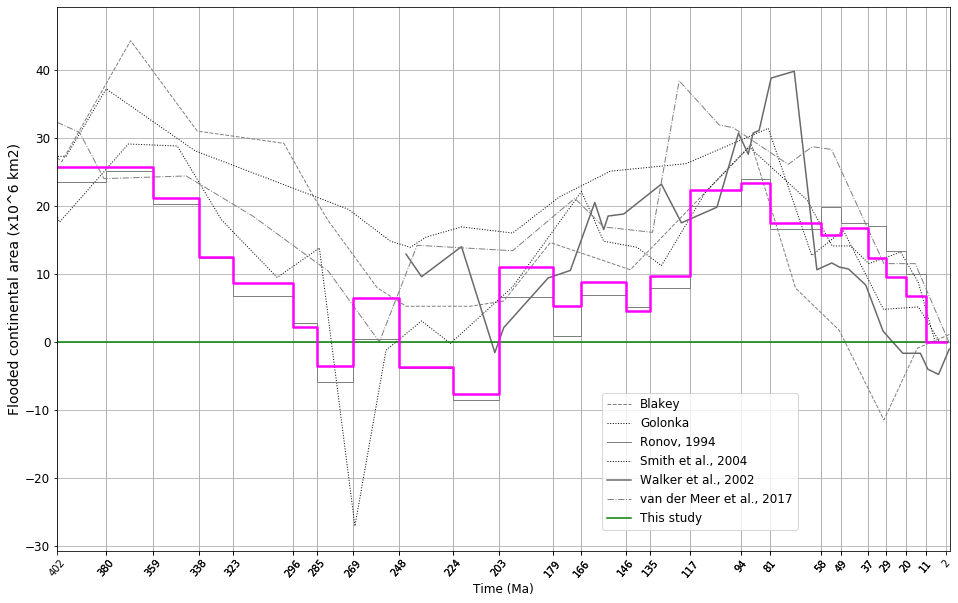

In [17]:
fig, ax1 = plt.subplots(figsize=(16,10))

ax1.plot(Blakey['Dataset x'],Blakey['Dataset y'],color='grey',linewidth=1.,linestyle='--')
ax1.plot(Golonka['Dataset x'],Golonka['Dataset y'],color='black',linewidth=1.,linestyle=':')
ax1.plot(TimeStep,Shallow_marine_Golonka_OriginalPaleogeogl*10-56.077,color='grey',linewidth=1.,linestyle='-')
ax1.plot(Ronov1994['Dataset x'],Ronov1994['Dataset y'],color='black',linewidth=1.,linestyle=':')
         #Ronov1994_original['Dataset x'],Ronov1994_original['Dataset y'],'red',
#ax1.plot(Scotese['Dataset x'],Scotese['Dataset y'],'purple')
ax1.plot(Smith2004['Dataset x'],Smith2004['Dataset y'],color='dimgrey',linewidth=1.5,linestyle='-')
ax1.plot(Walker2002['Dataset x'],Walker2002['Dataset y'],color='grey',linewidth=1.,linestyle='-.')
         #Walker2002_original['Dataset x'],Walker2002_original['Dataset y'],'black',label='Blakey'
ax1.plot(np.arange(1,838,1),vanDerMeer.iloc[2:,2]/1000000,'green',linewidth=1.5)
ax1.plot(TimeStep,My_ShallowMarineArea*10-62.40,'magenta',linewidth=2.5)

ax1.set_xlabel('Time (Ma)', fontsize=12)
#ax1.xaxis.set_label_position('top')
#ax1.xaxis.set_ticks_position('top')
ax1.set_xlim((402,0))
ax1.set_xticks(np.hstack((My['From_age'],My['To_age']))) #, size=12, rotation=50
ax1.xaxis.set_tick_params(labelsize=10,direction='out')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=50)
ax1.set_ylabel('Flooded continental area (x10^6 km2)', fontsize=14) #, color='b'
ax1.yaxis.set_tick_params(labelsize=12,direction='out')
ax1.grid()
l1= plt.legend(('Blakey','Golonka','Ronov, 1994','Smith et al., 2004','Walker et al., 2002','van der Meer et al., 2017','This study'),bbox_to_anchor=(0.61,.29), loc=2, borderaxespad=0., fontsize=12) #,bbox_to_anchor=(1.,1.), loc=2, borderaxespad=0.

plt.savefig('Output/Fig_09.pdf')
plt.show()


## Figure 11

### Read the data and make the figure

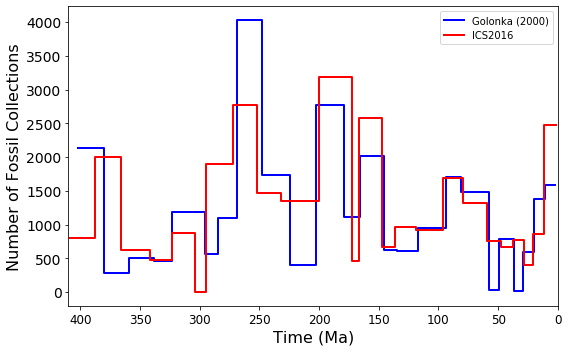

In [18]:
# Fossils testing paelogeog after gaps fixed
Data_ICS2016 = pd.read_excel('../Data/CR/ReconPaleogeog_Matthews2016_ICS2016/ReconPaleogeog_Matthews2016_ICS2016.xlsx', delimiter=',')  

# Fossils testing paelogeog after gaps fixed
Data1 = pd.read_excel('../Data/CR/CR_ReconPaleogeog_Matthews2016_TestByFossils/CR_ReconPaleogeog_Matthews2016_TestByFossils.xlsx', delimiter=',')  

fig, ax1 = plt.subplots(figsize=(8,5),tight_layout=True) #tight_layout=True,sharex=True

################## ICS2016
ConsistencyRatio_Marine_ICS2016 = np.zeros(len(Data_ICS2016['Marine Fossil Consistency Ratio'])*2)
ConsistencyRatio_Marine_ICS2016[::2] = 100*np.asarray(Data_ICS2016['Marine Fossil Consistency Ratio'])
ConsistencyRatio_Marine_ICS2016[1::2] = 100*np.asarray(Data_ICS2016['Marine Fossil Consistency Ratio'])

Numb_Marine_ICS2016 = np.zeros(len(Data_ICS2016['Overall Marine Fossils'])*2)
Numb_Marine_ICS2016[::2] = np.asarray(Data_ICS2016['Overall Marine Fossils'])
Numb_Marine_ICS2016[1::2] = np.asarray(Data_ICS2016['Overall Marine Fossils'])

TimeStep_ICS2016 = np.zeros(len(Data_ICS2016['From_age'])*2)
TimeStep_ICS2016[::2] = Data_ICS2016['To_age']
TimeStep_ICS2016[1::2] = Data_ICS2016['From_age']

################## Time scale of Golonka (2000)
ConsistencyRatio_Marine_1 = np.zeros(len(Data1['Marine Fossil Consistency Ratio'])*2)
ConsistencyRatio_Marine_1[::2] = 100*np.asarray(Data1['Marine Fossil Consistency Ratio'])
ConsistencyRatio_Marine_1[1::2] = 100*np.asarray(Data1['Marine Fossil Consistency Ratio'])

Numb_Marine_1 = np.zeros(len(Data1['Overall Marine Fossils'])*2)
Numb_Marine_1[::2] = np.asarray(Data1['Overall Marine Fossils'])
Numb_Marine_1[1::2] = np.asarray(Data1['Overall Marine Fossils'])

TimeStep = np.zeros(len(Data1['From_age'])*2)
TimeStep[::2] = Data1['To_age']
TimeStep[1::2] = Data1['From_age']

##################
### Plot the first subplot
p1= ax1.plot(TimeStep,Numb_Marine_1,color='blue',label='Golonka (2000)',linewidth=2.)
p2 = ax1.plot(TimeStep_ICS2016,Numb_Marine_ICS2016,color='red',label='ICS2016',linewidth=2.)

# set legend
ax1.legend('Golonka, 2000',fontsize=12) #loc='upper right',

#set y axis
ax1.set_ylabel('Number of Fossil Collections', fontsize=16)
ax1.yaxis.set_tick_params(labelsize=14,direction='out')
ax1.yaxis.set_ticks_position('left')

# set x labels
ax1.set_xlim((410,0))
ax1.set_xlabel('Time (Ma)', fontsize=16)
# set x tick and ticks' labels
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_tick_params(direction='out',labelsize=12) #labelsize=10,

plt.legend() 
plt.savefig('Output/Fig_11.pdf',dpi=600)
plt.show()


In [19]:
os.system('rm Output/*.png')

1